Based on https://www.kaggle.com/shereshevsky/a-modern-time-series-tutorial/notebook

In [45]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

myfavouritenumber = 42
seed = myfavouritenumber
np.random.seed(seed)

In [32]:
!pip install pmdarima

In [46]:
df = pd.read_csv("BAJAJFINSV.csv", parse_dates=["Date"])
df.set_index("Date", drop=False, inplace=True)
df.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.10,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.00,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.00,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.50,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.00,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514
2008-06-02,2008-06-02,BAJAJFINSV,EQ,644.00,650.00,699.00,622.00,687.00,686.95,670.51,2247399,1.506913e+14,NaN,351112,0.1562
2008-06-03,2008-06-03,BAJAJFINSV,EQ,686.95,672.00,689.80,632.55,670.55,672.05,665.87,2299383,1.531082e+14,NaN,391772,0.1704
2008-06-04,2008-06-04,BAJAJFINSV,EQ,672.05,674.00,674.00,566.60,595.00,598.95,602.36,2832725,1.706317e+14,NaN,735765,0.2597
2008-06-05,2008-06-05,BAJAJFINSV,EQ,598.95,603.00,639.80,572.30,631.50,631.85,610.65,1344712,8.211522e+13,NaN,167819,0.1248


In [47]:
df.index.is_monotonic, df.index.is_unique

(True, True)

In [48]:
df.shape

(3201, 15)

In [49]:
new_idx = pd.date_range("2008-05-26", "2021-04-30", freq="1D")

In [50]:
df = df.reindex(new_idx)

In [51]:
df.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.10,509.10,548.85,3145446.0,1.726368e+14,NaN,908264.0,0.2888
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.00,554.65,572.15,4349144.0,2.488370e+14,NaN,677627.0,0.1558
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.00,640.95,618.37,4588759.0,2.837530e+14,NaN,774895.0,0.1689
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.50,632.40,659.60,4522302.0,2.982921e+14,NaN,1006161.0,0.2225
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.00,644.00,636.41,3057669.0,1.945929e+14,NaN,462832.0,0.1514
2008-05-31,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-02,2008-06-02,BAJAJFINSV,EQ,644.00,650.00,699.00,622.00,687.00,686.95,670.51,2247399.0,1.506913e+14,NaN,351112.0,0.1562
2008-06-03,2008-06-03,BAJAJFINSV,EQ,686.95,672.00,689.80,632.55,670.55,672.05,665.87,2299383.0,1.531082e+14,NaN,391772.0,0.1704
2008-06-04,2008-06-04,BAJAJFINSV,EQ,672.05,674.00,674.00,566.60,595.00,598.95,602.36,2832725.0,1.706317e+14,NaN,735765.0,0.2597


In [52]:
df.shape

(4723, 15)

<AxesSubplot:xlabel='Date'>

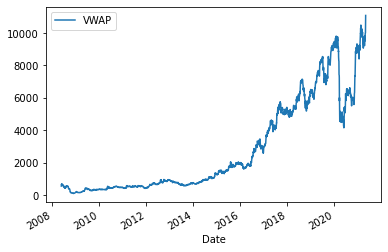

In [53]:
df.plot(x='Date',y='VWAP')

In [54]:
df.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()

/var/folders/ff/w3p6wd3x1pqgfpfy48trmp5m0000gr/T/ipykernel_13584/3792767483.py:28: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
/var/folders/ff/w3p6wd3x1pqgfpfy48trmp5m0000gr/T/ipykernel_13584/3792767483.py:28: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,...,9.318794e+13,2.969573e+13,3.663758e+13,4.985215e+13,20743.251953,20834.957031,20614.623047,6182.26123,7630.263672,10195.368164
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,...,1.726368e+14,2.969573e+13,3.663758e+13,4.985215e+13,20743.251953,20834.957031,20614.623047,6182.26123,7630.263672,10195.368164
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,...,2.107369e+14,5.388164e+13,5.388164e+13,5.388164e+13,20743.251953,20834.957031,20614.623047,6182.26123,7630.263672,10195.368164
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,...,2.350756e+14,5.682195e+13,5.682195e+13,5.682195e+13,20743.251953,20834.957031,20614.623047,6182.26123,7630.263672,10195.368164
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,...,2.508797e+14,2.541759e+13,5.613884e+13,5.613884e+13,20743.251953,20834.957031,20614.623047,6182.26123,7630.263672,10195.368164


In [55]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.isocalendar().week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,...,20743.251953,20834.957031,20614.623047,6182.26123,7630.263672,10195.368164,5.0,22,26.0,0.0
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,...,20743.251953,20834.957031,20614.623047,6182.26123,7630.263672,10195.368164,5.0,22,27.0,1.0
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,...,20743.251953,20834.957031,20614.623047,6182.26123,7630.263672,10195.368164,5.0,22,28.0,2.0
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,...,20743.251953,20834.957031,20614.623047,6182.26123,7630.263672,10195.368164,5.0,22,29.0,3.0
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,...,20743.251953,20834.957031,20614.623047,6182.26123,7630.263672,10195.368164,5.0,22,30.0,4.0


In [58]:
df_train = df[df.Date < "2019"]
df_valid = df[df.Date >= "2019"]

exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "week", "day", "day_of_week"]

In [61]:
df_valid.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2019-01-01,BAJAJFINSV,EQ,6476.95,6515.00,6530.0,6418.00,6515.0,6521.95,6477.89,...,24167.000000,26303.250000,26587.800781,6182.261230,3023.035889,8738.079102,1.0,1,1.0,1.0
2019-01-02,2019-01-02,BAJAJFINSV,EQ,6521.95,6475.00,6526.0,6360.00,6404.0,6384.00,6440.03,...,18586.500000,23643.800781,25941.046875,7892.018555,6497.494141,9017.781250,1.0,1,2.0,2.0
2019-01-03,2019-01-03,BAJAJFINSV,EQ,6384.00,6439.00,6479.9,6331.65,6390.0,6383.30,6406.39,...,19576.333984,22593.000000,25969.714844,5837.918457,6278.592773,9002.078125,1.0,1,3.0,3.0
2019-01-04,2019-01-04,BAJAJFINSV,EQ,6383.30,6419.95,6460.0,6357.00,6418.0,6410.45,6404.79,...,19538.333984,21327.800781,26106.000000,5793.296875,4774.647949,8947.614258,1.0,1,4.0,4.0
2019-01-07,2019-01-07,BAJAJFINSV,EQ,6410.45,6450.50,6500.0,6385.00,6416.0,6407.15,6432.71,...,17590.000000,20074.400391,25368.421875,6182.261230,4767.291992,9580.373047,1.0,2,7.0,0.0


In [57]:
model = auto_arima(df_train.VWAP, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid.loc[:,"Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=nan sec


ValueError: Could not successfully fit a viable ARIMA model to input data.
See http://alkaline-ml.com/pmdarima/no-successful-model.html for more information on why this can happen.